<a href="https://colab.research.google.com/github/Alessio6602/Pneumonia_diagnosis/blob/main/Pneumonia_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#import necessary libraries when needed
import os
import numpy as np
import pandas as pd
import pathlib
import imageio



In [ ]:
# Exploring dataset
base_dir = 'drive/MyDrive/ChestXRay2017/'

train_pneumonia_dir = base_dir+'train/PNEUMONIA/'
train_normal_dir=base_dir+'train/NORMAL/'

test_pneumonia_dir = base_dir+'test/PNEUMONIA/'
test_normal_dir = base_dir+'test/NORMAL/'

val_normal_dir= base_dir+'val/NORMAL/'
val_pnrumonia_dir= base_dir+'val/PNEUMONIA/'

train_pn = [train_pneumonia_dir+"{}".format(i) for i in os.listdir(train_pneumonia_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

test_normal = [test_normal_dir+"{}".format(i) for i in os.listdir(test_normal_dir)]
test_pn = [test_pneumonia_dir+"{}".format(i) for i in os.listdir(test_pneumonia_dir)]

val_pn= [val_pnrumonia_dir+"{}".format(i) for i in os.listdir(val_pnrumonia_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]

print ("Total images:",len(train_pn+train_normal+test_normal+test_pn+val_pn+val_normal))
print ("Total pneumonia images:",len(train_pn+test_pn+val_pn))
print ("Total Normal images:",len(train_normal+test_normal+val_normal))

Total images: 2348
Total pneumonia images: 1643
Total Normal images: 705


In [ ]:
# Dataset Splitting (train 80% , test 15% and validation 5% )
# Gathering all pneumonia and normal chest X-ray in two python list
pn = train_pn + test_pn + val_pn
normal = train_normal + test_normal + val_normal

# Spliting dataset in train set,test set and validation set.

train_imgs = pn[:1314]+ normal[:564]  # 80% of 4273 Pneumonia and normal chest X-ray are 3418 and 1224 respectively.
test_imgs = pn[1314:1561]+ normal[564:670]
val_imgs = pn[1561:] + normal[670:]

print("Total Train Images %s containing %s pneumonia and %s normal images"
      % (len(train_imgs),len(pn[:1314]),len(normal[:564])))
print("Total Test Images %s containing %s pneumonia and %s normal images"
      % (len(test_imgs),len(pn[1314:1561]),len(normal[564:670])))
print("Total validation Images %s containing %s pneumonia and %s normal images"
      % (len(val_imgs),len(pn[1561:]),len(normal[670:])))

#da xray_ridotto a xray completo -> 1314->3148, 564->1224, 1561->4059, 670->1502

import random

random.shuffle(train_imgs)
random.shuffle(test_imgs)
random.shuffle(val_imgs)

Total Train Images 1878 containing 1314 pneumonia and 564 normal images
Total Test Images 353 containing 247 pneumonia and 106 normal images
Total validation Images 117 containing 82 pneumonia and 35 normal images


In [ ]:
print(test_imgs[5])

drive/MyDrive/ChestXRay2017 - Copia/chest_xray/test/NORMAL/IM-0023-0001.jpeg


In [ ]:
import cv2
import torch
import torchvision
from torchvision import transforms
import tensorflow as tf
import numpy as np
img_size = 224

def preprocess_image(image_list):

    X = [] #images
    y = [] #labels (0 for Normal or 1 for Pneumonia)
    count=0

    for image in image_list:

        try:

            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)

            img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)

            #convert image to 2D to 3D
            img = np.dstack([img, img, img])

            #convrt greyscale image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Normalize Image
            img = img.astype(np.float32)/255.

            count=count+1

            X.append(img)


        except:
            continue
        #get the labels
        if 'NORMAL' in image:
            y.append(0)

        elif 'IM' in image:
            y.append(0)

        elif 'virus' or 'bacteria' in image:
            y.append(1)


    return X, y

In [ ]:
X, y = preprocess_image(train_imgs)

In [ ]:
# Check all the images getting labels or not

arr=y
uniqueValues, occurCount = np.unique(arr, return_counts=True)

print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [ 564 1313]


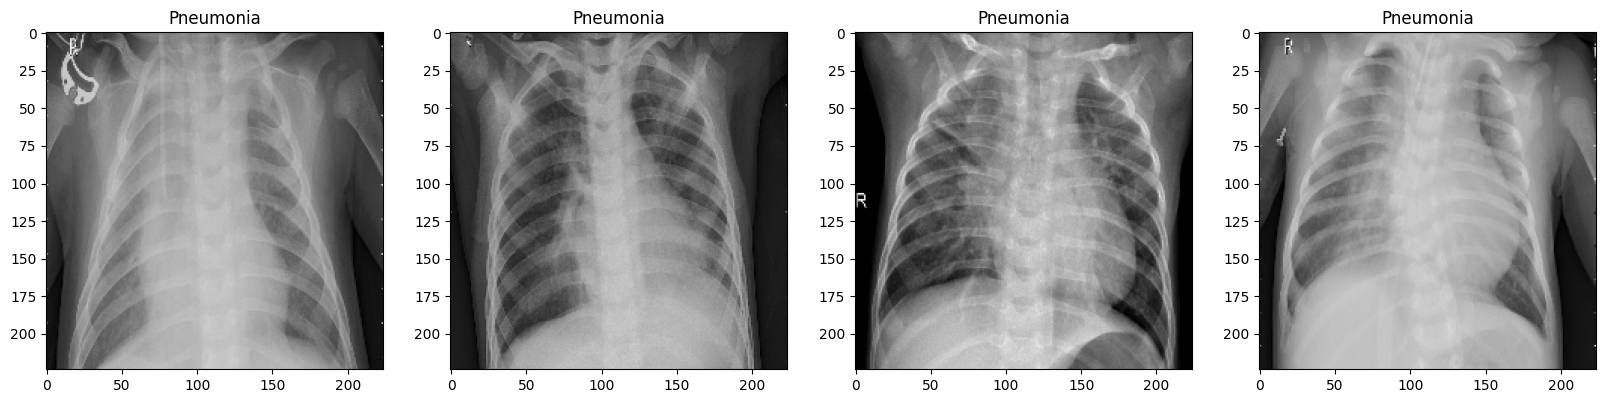

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (y[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(X[i])
    k=k+1;


In [ ]:
# get the labels for test set

P, t = preprocess_image(test_imgs)

In [ ]:
arr=t
uniqueValues, occurCount = np.unique(arr, return_counts=True)

print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [106 247]


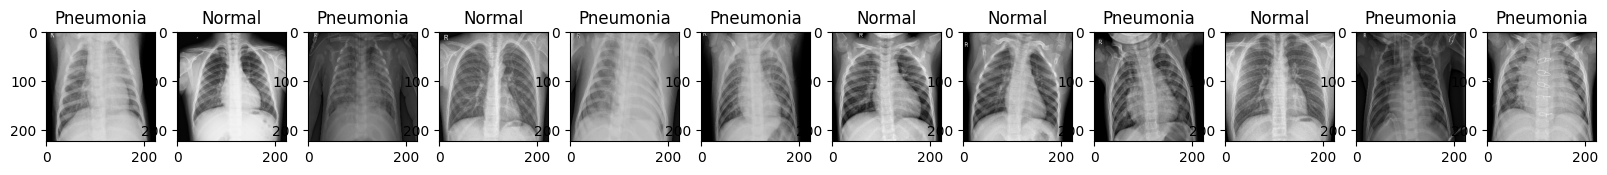

In [ ]:
# now displaying some images from test set
# Feel free to show more image by changing the values
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (t[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(P[i])
    k=k+1;

In [ ]:
# get the labels for validation set

K, m = preprocess_image(val_imgs)

In [ ]:
arr=m


# Get a tuple of unique values & their frequency in numpy array
uniqueValues, occurCount = np.unique(arr, return_counts=True)

print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [35 82]


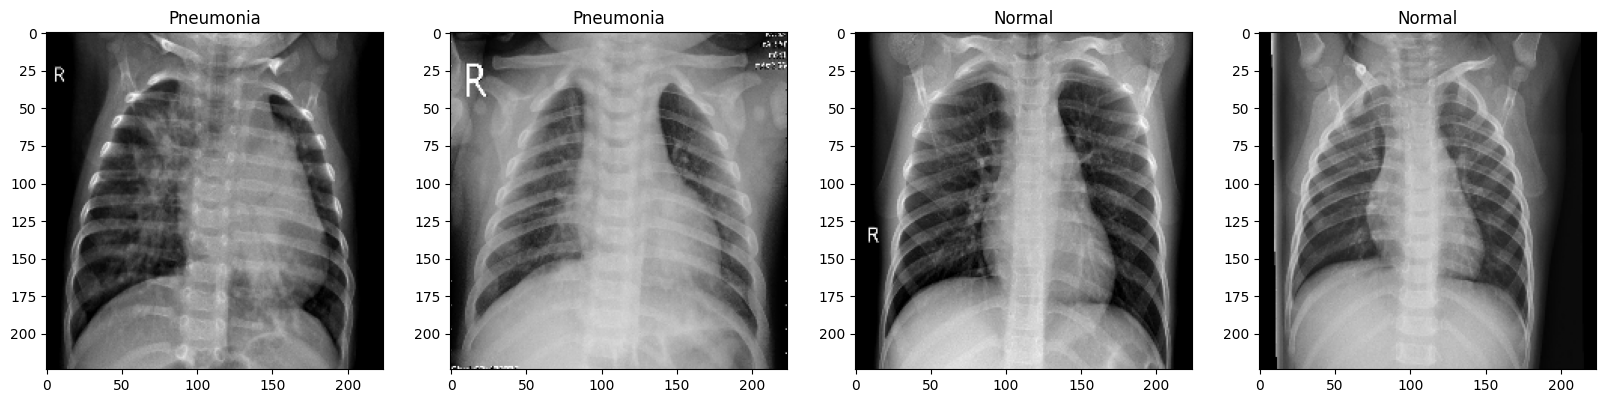

In [ ]:
# now displaying some images from validation set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (m[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(K[i])
    k=k+1;

In [ ]:
from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(y),
                                        y = y)
class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: 1.6640070921985815, 1: 0.7147753236862148}


In [ ]:
import seaborn as sns
import gc

train_imgs = train_pn[:1314]+ train_normal[:564]
del train_imgs
gc.collect()

X_train = np.array(X)
y_train = np.array(y)
X_test = np.array(P)
y_test = np.array(t)
X_val = np.array(K)
y_val = np.array(m)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(1877, 224, 224, 3)
(1877,)
(353, 224, 224, 3)
(353,)
(117, 224, 224, 3)
(117,)


In [ ]:
# clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)

val_datagen = ImageDataGenerator(zoom_range=0.45)

In [ ]:
batch_size = 16

Using TensorFlow backend.

In [ ]:
#Create the image generators

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
print(train_generator)
print(val_generator)

In [ ]:
# Set image Size
img_size =224

commento importante su globalaveragepooling

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import *
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

# Create the base pre-trained model
# Weights should be none because we don't need to train with any pre-trained weights here

base_model = MobileNet(weights=None, include_top=False,input_shape=(img_size, img_size, 3))

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

#l'early stopping tiene conto della validation loss, e se per 20 epoche consecutive (patience) non migliora di almeno 0,001 (min_delta) verrà triggerato l'early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001, restore_best_weights=True)

# Compile model
model.compile(optimizer='adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])

In [ ]:
#Scegliere il numero di epoche (iterazioni) per cui addestrare il modello
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=150,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size,
                              class_weight =class_weights,
                              callbacks=[early_stopping]
)

<ipython-input-26-6111a33be62c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/150
117/117 [==============================] - 45s 228ms/step - loss: 0.4419 - binary_accuracy: 0.7920 - mae: 0.2487 - val_loss: 0.6631 - val_binary_accuracy: 0.6964 - val_mae: 0.3723
Epoch 2/150
117/117 [==============================] - 27s 226ms/step - loss: 0.3337 - binary_accuracy: 0.8469 - mae: 0.1926 - val_loss: 0.8370 - val_binary_accuracy: 0.7054 - val_mae: 0.3231
Epoch 3/150
117/117 [==============================] - 27s 228ms/step - loss: 0.3134 - binary_accuracy: 0.8560 - mae: 0.1770 - val_loss: 0.7136 - val_binary_accuracy: 0.7054 - val_mae: 0.3442
Epoch 4/150
117/117 [==============================] - 27s 230ms/step - loss: 0.2520 - binary_accuracy: 0.8872 - mae: 0.1513 - val_loss: 0.9138 - val_binary_accuracy: 0.7143 - val_mae: 0.3054
Epoch 5/150
117/117 [==============================] - 28s 243ms/step - loss: 0.3127 - binary_accuracy: 0.8667 - mae: 0.1801 - val_loss: 1.6205 - val_binary_accuracy: 0.7232 - val_mae: 0.2780
Epoch 6/150
117/117 [===================

In [ ]:
model.save('drive/MyDrive/150epochsmodel5.keras')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

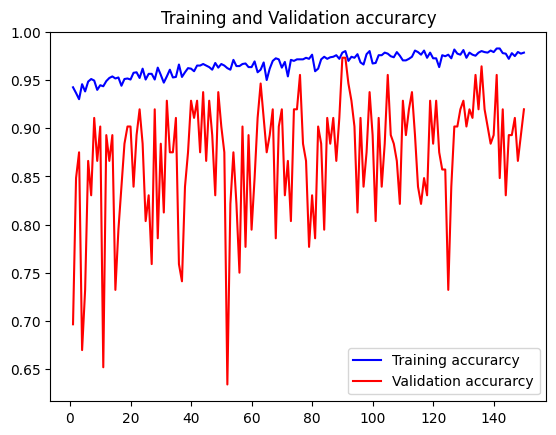

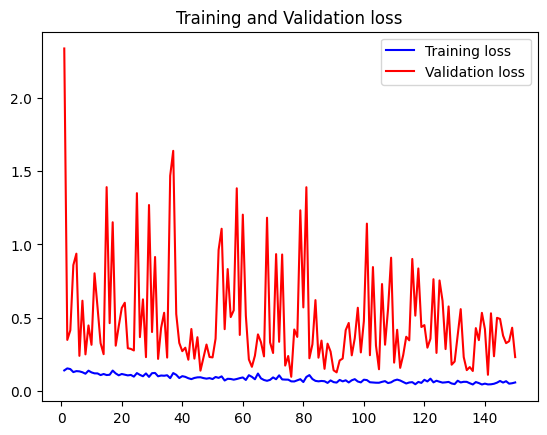

In [ ]:
# Lets plot the train and val curve
# Get the details form the history object
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

12/12 [==============================] - 1s 44ms/step - loss: 0.2297 - binary_accuracy: 0.9235 - mae: 0.0779
Loss of the model is -  0.22965101897716522
12/12 [==============================] - 0s 35ms/step - loss: 0.2297 - binary_accuracy: 0.9235 - mae: 0.0779
Accuracy of the model is -  92.35127568244934 %


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

preds = model.predict(X_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}%'.format(2*precision*recall/(precision+recall)))

print('\TEST METRIC ----------------------')
print('Test acc: {}%'.format(np.round((history.history['binary_accuracy'][-1])*100, 2)))

12/12 [==============================] - 0s 34ms/step
CONFUSION MATRIX ------------------
[[ 95  11]
 [ 16 231]]

============TEST METRICS=============
Accuracy: 92.3512747875354%
Precision: 95.45454545454545%
Recall: 93.52226720647774%
F1-score: 94.47852760736197
\TEST METRIC ----------------------
Test acc: 97.85


<Axes: >

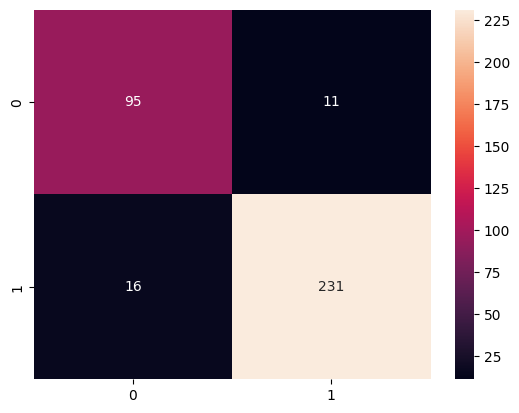

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d",)

The ROC (receiver operating characteristic) curve indicates the diagnostic accuracy and performance of a model. We show the ROC curve and also calculate AUC score.

AUC Score: 0.9820869299518753


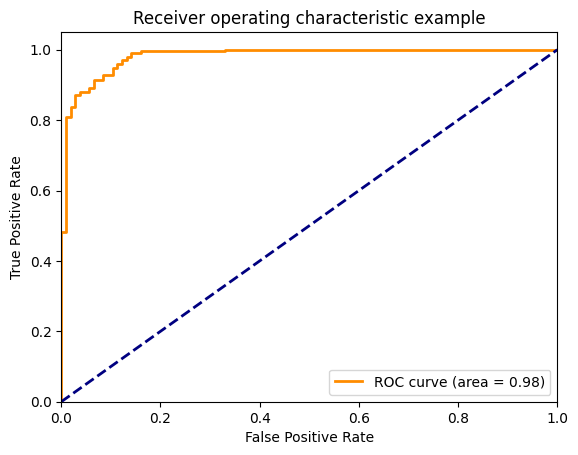

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , preds)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Esecuzione su modello pre-addestrato



In [ ]:
import keras
from google.colab import drive
drive.mount("/content/drive")
from keras.models import load_model
model = load_model('drive/MyDrive/150epochsmodel4.keras')

Mounted at /content/drive


In [ ]:
#attivare la cella solo se viene solo analizzato il test set caricando il modello da drive

!pip install tensorflow
import os
import numpy as np
import pandas as pd
import pathlib
import imageio

base_dir = 'drive/MyDrive/ChestXRay2017/'

train_pneumonia_dir = base_dir+'train/PNEUMONIA/'
train_normal_dir=base_dir+'train/NORMAL/'

test_pneumonia_dir = base_dir+'test/PNEUMONIA/'
test_normal_dir = base_dir+'test/NORMAL/'

val_normal_dir= base_dir+'val/NORMAL/'
val_pnrumonia_dir= base_dir+'val/PNEUMONIA/'

train_pn = [train_pneumonia_dir+"{}".format(i) for i in os.listdir(train_pneumonia_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

test_normal = [test_normal_dir+"{}".format(i) for i in os.listdir(test_normal_dir)]
test_pn = [test_pneumonia_dir+"{}".format(i) for i in os.listdir(test_pneumonia_dir)]

val_pn= [val_pnrumonia_dir+"{}".format(i) for i in os.listdir(val_pnrumonia_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]

print ("Total images:",len(train_pn+train_normal+test_normal+test_pn+val_pn+val_normal))
print ("Total pneumonia images:",len(train_pn+test_pn+val_pn))
print ("Total Normal images:",len(train_normal+test_normal+val_normal))
pn = train_pn + test_pn + val_pn
normal = train_normal + test_normal + val_normal

# Spliting dataset in train set,test set and validation set.

train_imgs = pn[:1314]+ normal[:564]  # 80% of 4273 Pneumonia and normal chest X-ray are 3418 and 1224 respectively.
test_imgs = pn[1314:1561]+ normal[564:670]
val_imgs = pn[1561:] + normal[670:]

print("Total Train Images %s containing %s pneumonia and %s normal images"
      % (len(train_imgs),len(pn[:1314]),len(normal[:564])))
print("Total Test Images %s containing %s pneumonia and %s normal images"
      % (len(test_imgs),len(pn[1314:1561]),len(normal[564:670])))
print("Total validation Images %s containing %s pneumonia and %s normal images"
      % (len(val_imgs),len(pn[1561:]),len(normal[670:])))

#da xray_ridotto a xray completo -> 1314->3148, 564->1224, 1561->4059, 670->1502

import random

random.shuffle(train_imgs)
random.shuffle(test_imgs)
random.shuffle(val_imgs)

import cv2
import torch
import torchvision
from torchvision import transforms
import tensorflow as tf
import numpy as np
img_size = 224

def preprocess_image(image_list):

    X = [] # images
    y = [] #labels (0 for Normal or 1 for Pneumonia)
    count=0

    for image in image_list:

        try:

            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)

            img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)

            #convert image to 2D to 3D
            img = np.dstack([img, img, img])

            #convrt greyscale image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Normalize Image
            img = img.astype(np.float32)/255.

            count=count+1

            X.append(img)


        except:
            continue
        #get the labels
        if 'NORMAL' in image:
            y.append(0)

        elif 'IM' in image:
            y.append(0)

        elif 'virus' or 'bacteria' in image:
            y.append(1)


    return X, y

P, t = preprocess_image(test_imgs)

Total images: 2348
Total pneumonia images: 1643
Total Normal images: 705
Total Train Images 1878 containing 1314 pneumonia and 564 normal images
Total Test Images 353 containing 247 pneumonia and 106 normal images
Total validation Images 117 containing 82 pneumonia and 35 normal images


In [ ]:
X_test = np.array(P)
y_test = np.array(t)

In [ ]:
! pip install tf_keras_vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.4 MB/s eta 0:00:00


Testing image 0
1
1/1 [==============================] - 1s 907ms/step
Probabilità che il paziente sia malato: 100.00%
Testing image 1
0
1/1 [==============================] - 0s 52ms/step
Probabilità che il paziente sia malato: 0.78%
Testing image 2
1
1/1 [==============================] - 0s 160ms/step
Probabilità che il paziente sia malato: 100.00%
[0.9999962, 0.007827401, 1.0]


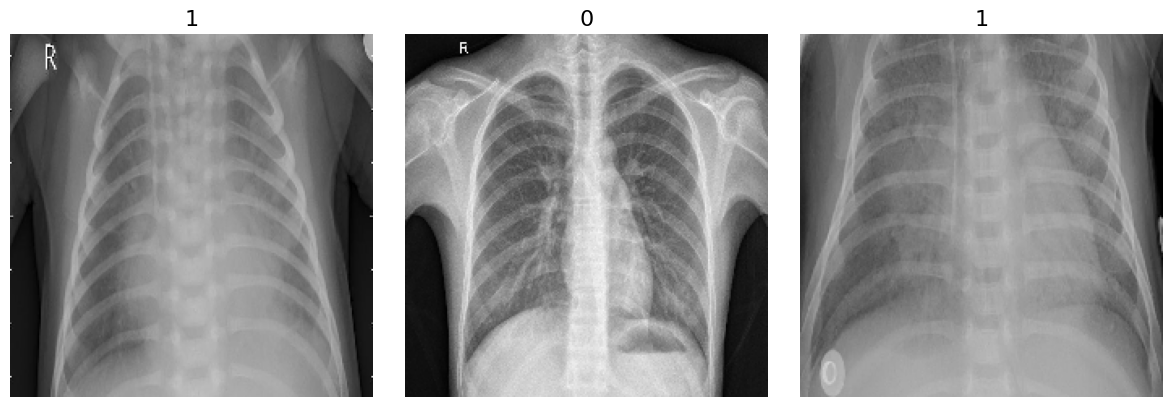

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np


# Funzione per visualizzare le previsioni
def predict_image(image):

    image = np.expand_dims(image, axis=0)

    # Fai una previsione usando il modello, probabilità che appartenga alla classe 1
    predictions = model.predict(image)

    # Percentuale di appartenenza alla classe 1
    confidence = predictions[0][0]

    print(f"Probabilità che il paziente sia malato: {confidence * 100:.2f}%")

    return confidence

prob=['']
for i in range(3):
    print(f"Testing image {i}")
    print(y_test[i])
    prob.append(predict_image(X_test[i]))
prob=prob[1:]
print(prob)
images=np.asarray([np.array(X_test[0]), np.array(X_test[1]), np.array(X_test[2])])
images=images*255
images = images.astype(int)
X = preprocess_input(images)
image_titles = [y_test[0], y_test[1], y_test[2]]
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

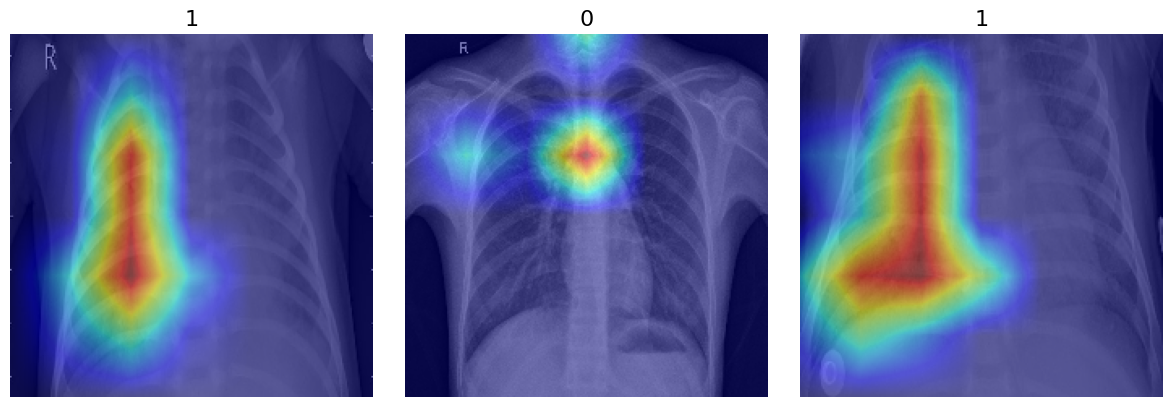

In [ ]:
from matplotlib import cm
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
replace2linear = ReplaceToLinear()
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

from tf_keras_vis.utils.scores import BinaryScore

#valori di appartenenza alle classi 0<x<1
score = BinaryScore([prob[0],prob[1],prob[2]])

# Generate heatmap with GradCAM
cam = gradcam(score,
              X,
              penultimate_layer=-1)

# output
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()